11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 0.3486 - val_loss: 0.2346
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2217 - val_loss: 0.1890
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.1833 - val_loss: 0.1649
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1613 - val_loss: 0.1477
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1454 - val_loss: 0.1353
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


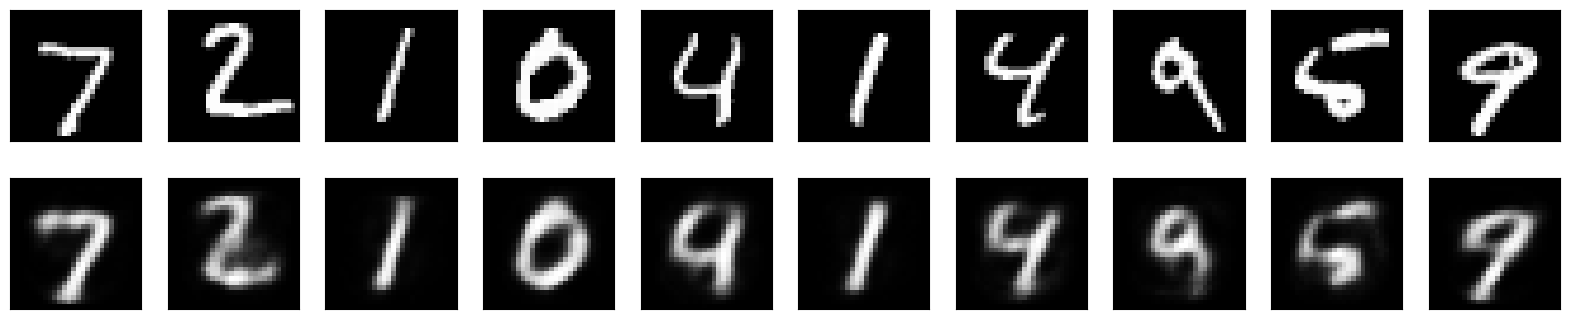

In [1]:
import numpy as np
import keras
from keras import layers
from keras.datasets import mnist
# from keras.models import Model
# from keras.layers import Input, Dense
# from keras.optimizers import Adam

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='sigmoid')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

import matplotlib.pyplot as plt

encoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()